# Plant height growth

### Taken from: _Introduction ot mathematical modeling of crop growth_, by Christopher Teh.

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt

This notebook deals with the following formula:

In [9]:
%%latex
$$ \huge h_{ts}  =  \frac{ h_m }{ 1 + b_0 \cdot e^{-b_1 \cdot T_{\Sigma_{ts}}}} $$

<IPython.core.display.Latex object>

In [51]:
def temperature_sum( temp_avgs, temp_base ):

    temperatures_above = []
    for element in temp_avgs:
        temperatures_above = temperatures_above + [ element - temp_base ]

    temperature_sum = 0
    for element in temperatures_above:
        if element>0:
            temperature_sum = temperature_sum + element

    return temperature_sum

In [29]:
t = [ item+1 for item in range(9) ]
temp_avg = [ 4, 5, 8, 10, 12, 10, 8, 5, 8 ]
temp_base = 5 # General plant growth - Table 7.6, pag. 153

In [31]:
print( t )

[1, 2, 3, 4, 5, 6, 7, 8, 9]


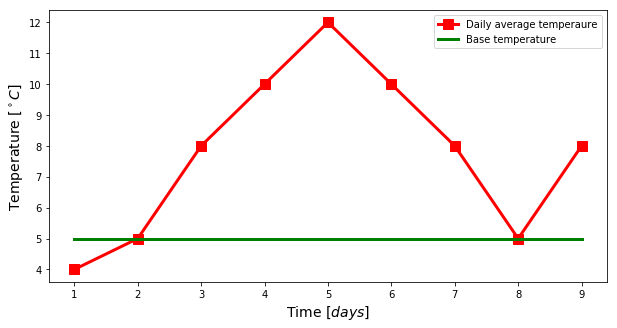

In [50]:
fig, ax = plt.subplots( nrows=1, ncols=1, figsize=(10,5) )

ax.plot( t, temp_avg, linewidth=3, marker='s', markersize=10, color='red', label='Daily average temperaure' )
ax.plot( t, [temp_base]*len(t), linewidth=3, color='green', label='Base temperature' )

ax.set_ylabel( 'Temperature $[^\circ C]$', fontsize=14 )
ax.set_xlabel( 'Time [$days$]', fontsize=14 )

ax.legend()

plt.show()

In [28]:
temperature_sum( temp_avg, temp_base )

26

In [55]:
day_temperature_sums = []
for i in range(len(temp_avg)):
    day_temperature_sums = day_temperature_sums + [ temperature_sum( temp_avg[:i+1], temp_base ) ]
day_temperature_sums

[0, 0, 3, 8, 15, 20, 23, 23, 26]

In [67]:
def day_temperature_sums( temp_avgs, temp_base ):
    
    day_temperature_sums = []
    for i in range(len(temp_avg)):
        current_sum = temperature_sum( temp_avg[:i+1], temp_base )
        day_temperature_sums = day_temperature_sums + [ current_sum ]

    return day_temperature_sums

In [68]:
dts = day_temperature_sums( temp_avg, temp_base )
print( dts )

[0, 0, 3, 8, 15, 20, 23, 23, 26]


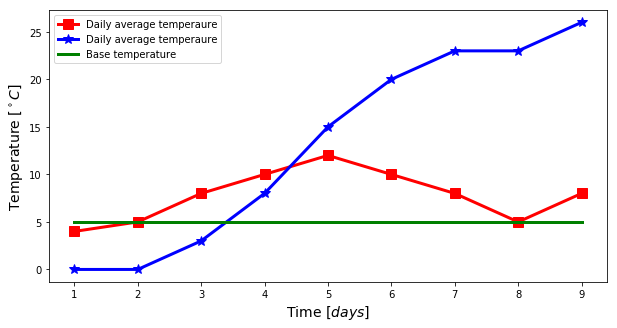

In [69]:
fig, ax = plt.subplots( nrows=1, ncols=1, figsize=(10,5) )

ax.plot( t, temp_avg, linewidth=3, marker='s', markersize=10, color='red', label='Daily average temperaure' )
ax.plot( t, dts, linewidth=3, marker='*', markersize=10, color='blue', label='Daily average temperaure' )
ax.plot( t, [temp_base]*len(t), linewidth=3, color='green', label='Base temperature' )

ax.set_ylabel( 'Temperature $[^\circ C]$', fontsize=14 )
ax.set_xlabel( 'Time [$days$]', fontsize=14 )

ax.legend()

plt.show()

In [61]:
def plant_height( temperature_sum, hm, b0, b1 ):
    
    import numpy as np
    
    return hm / ( 1 + b0 * np.exp( -1 * b1 * temperature_sum ) )

In [100]:
b0 = 10
b1 = 0.05
max_height = 0.6 # in meters

heights = []
for element in dts:
    current_height = plant_height( element, max_height, b0, b1 )
    heights = heights + [ current_height ]

print( heights )

[0.22727272727272727, 0.22727272727272727, 0.2973294272777595, 0.4551007070995302, 0.7736820353914426, 1.0623141441508495, 1.2483843177784821, 1.2483843177784821, 1.4345261201473265]


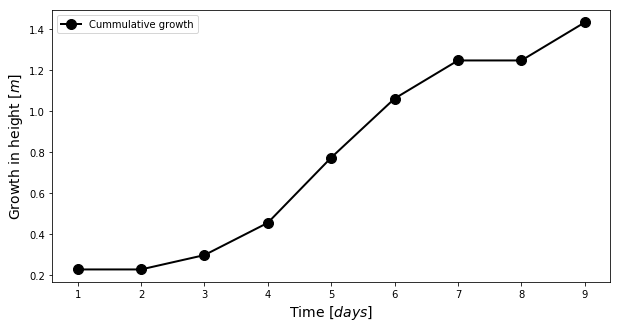

In [101]:
fig, ax = plt.subplots( nrows=1, ncols=1, figsize=(10,5) )

ax.plot( t, heights, linewidth=2, marker='o', markersize=10, color='black', label='Cummulative growth' )

ax.set_ylabel( 'Growth in height $[m]$', fontsize=14 )
ax.set_xlabel( 'Time [$days$]', fontsize=14 )

ax.legend()

plt.show()